# Интернет-магазин «Стримчик»

## Вводная часть

<a id='1-topoc'></a>

### Описание проекта

В проекте проекте изучаются данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цль проекта заключается в выявлении определяющих успешность игры закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Изучаются данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

____ 

### Цель исследования

Провести анализ данных при помощи которых интернет магазин сможет правильно распорядиться бюджетом на закупку игр, выявить целевую аудиторию по регионам и получить прогноз на следующий период.

____ 

### Задачи исследования

Для достижения поставленных целей необходимо произвести прдеобработку данных, провести исследовательский анализ и проверить некоторые гепотезы.

____ 

### Исходные данные

Для проведения исследования был получен датасет содержащий следующую информацию:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (возрастная категория)

____ 

### Ход исследования

1) [Вводная часть](#1-topoc)

2) [Загрузка данных, предварительное ознакомление](#2-topoc)

3) [Предобработка данных](#3-topoc)

4) [Исследовательский анализ](#4-topoc)

5) [Составление портрета пользователя каждого региона](#5-topoc)

6) [Проверка гипотез](#6-topoc)

7) [Вывод](#7-topoc)

## Загрузка данных
<a id='2-topoc'></a>

In [43]:
import seaborn as sb
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [44]:
games = pd.read_csv('/datasets/games.csv')

In [45]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [46]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод

Для анализа был получен датасет из 11 колонок и 16714 строк. В данных наблюдаются пропуски, также требуется упорядочивание названий столбцов. Наблюдаются ошибка форматов данных и прочие сложности. Приступим к предобработке

## Предобработка данных
<a id='3-topoc'></a>

### Упорядочим названий столбцов

In [47]:
games = games.rename(columns = {'Name':'name', 
                        'Platform':'platform', 
                        'Year_of_Release':'year_of_release', 
                        'Genre':'genre', 
                        'NA_sales': 'na_sales',
                        'EU_sales':'eu_sales',
                        'JP_sales':'jp_sales',
                        'Other_sales':'other_sales',
                        'Critic_Score':'critic_score',
                        'User_Score':'user_score',
                        'Rating':'rating'
                       })


games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков
<a id='1-tabel'></a>

Text(33.0, 0.5, 'Строка')

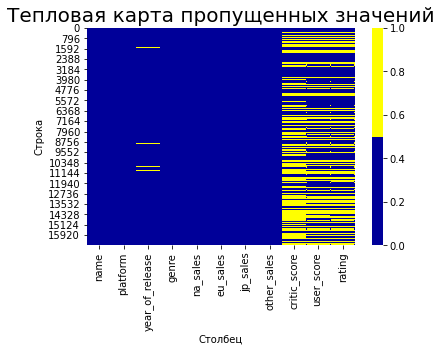

In [48]:
colours = ['#000099', '#ffff00'] 
tb_isna = sb.heatmap(games.isnull(), cmap=sb.color_palette(colours))
tb_isna.set_title('Тепловая карта пропущенных значений',fontsize=20)
tb_isna.set_xlabel('Столбец',fontsize=10)
tb_isna.set_ylabel('Строка',fontsize=10)


~Наблюдаются пропуски в столбце с годом релиза игры, оценках критиков и пользователей, рейтинге. Пропуски в году выпуска и рейтингу заменим самымми повторяющимися значениями датасета. По остальным пропускам, проверим есть ли у них взаимосвязь с другими данными.~

 Наблюдаются пропуски в столбце с годом релиза игры, оценках критиков и пользователей, рейтинге. 
 
1) В столбце с годом релиза пропусков очень небольшое количество, вероятно это человеческий фактор при сборе данных послужил причиной. Пропуски наблюдаются менее чем в 2% данных, поэтому их можно вполне безболезненно удалить.

2) В [таблице пропущенных значений](#1-tabel) видно, что пропуски в оценках пользователей, критиков и рейтинге зачастую наблюдаюстя в одних и тех же строках, что подсказывает нам - природа у пропусков одинаковая. Вероятно в нашем исследовании присутствуют игры от инди разработчиков или "пиратские" версии. Такие игры не оцениваются рейтинговыми агенствами и не получают официальных оценок от критиков или пользователей. 
<a id='как_же_мне_нравятся_эти_ссылки'></a>

Тем не менее пропущенных значений слишком много, чтобы их можно было заменить или восполнить без потери актуальности, поэтому оставим значения как есть.

3) По tbd раскрыла [ниже](#1-Просто_было_интересно_работает_ли_кириллицей) 

4) Примем к сведению рассуждения выше и приступим к предобработке


In [49]:
games = games.dropna(subset=['year_of_release'])

In [52]:
games['rating'] = games['rating'].fillna(0)
games['rating'].unique()

array(['E', 0, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Взаимосвязь с другими данными не обнаружена, так как пропуски в колонках рейтинга занимают более 50% любая подстановка приведет к сильному искажению данных. Поэтому пропущенные значения оставляем.

### Упорядочивание типов данных

По уникальным значениям оценок критиков можно увидеть, что значения необходимо привести в десятичную систему исчисления как и оценки пользователей, для этого поделим значения на 10.

In [54]:
games['critic_score'] = games['critic_score']/10

Год выпуска - это целочисленное значение

In [55]:
games['year_of_release'] = games['year_of_release'].astype('int64')

In [56]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<a id='1-Просто_было_интересно_работает_ли_кириллицей'></a>
В оценках пользователей присутствует строковое значение tbd - To Be Determined. Выходит, эти оценки еще не опубликованы - заменим их на нули и преобразуем тип данных в дробный. 


In [57]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [58]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Обработка дубликатов

In [59]:
games.duplicated(subset=['name','platform']).sum()

4

In [60]:
games.duplicated(subset=['name','year_of_release']).sum()

4250

При проверке на дубликаты пары "Имя - Игровая консоль" обнаружено четыре дубликата, количество относительно маленькое - удалим найденые дубликаты. При проверке на дубликаты пары "Имя - Год выпуска" обнаружено 4984 дублей - это почти треть датасета, удалять дубликаты нельзя, но при анализе года выпуска примем к сведению наличие дубликатов.

In [61]:
games.drop_duplicates(subset=['name','platform'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод

В процессе предобработки данных были упорядочены названия столбцов датафрейма, типы данных, обработаны пропуски и проведена проверка на дубликаты. Данные для исследования были получены не очень хорошего качества, но после предобработки могут быть использованы для дальнейшего исследования.

## Исследовательский анализ
<a id='4-topoc'></a>

 ### Сколько игр выпускалось в разные годы

Text(0, 0.5, 'Сумма продаж, млн копий')

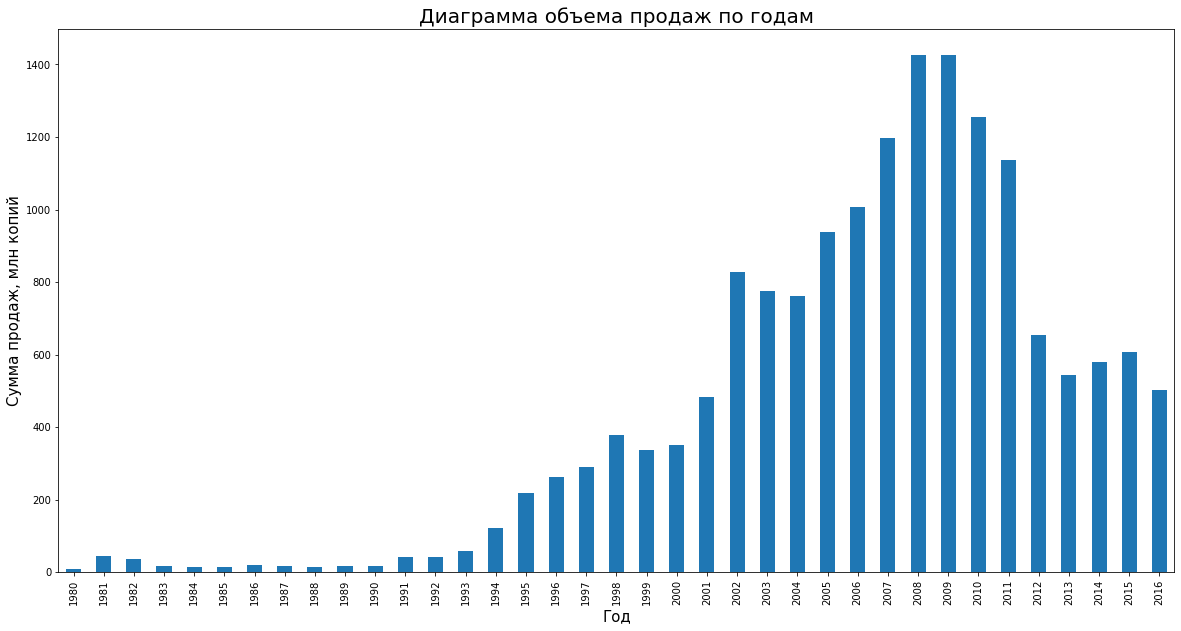

In [62]:
s_games = games.groupby('year_of_release')['name'].count().plot.bar(figsize = (20,10))

s_games.set_title('Диаграмма объема продаж по годам',fontsize=20)
s_games.set_xlabel('Год',fontsize=15)
s_games.set_ylabel('Сумма продаж, млн копий',fontsize=15)

Первый персональный компьютер появился в 1981 году и разумеется ближайшие лет 10 разработка игр не была приоритетной задачей. По графику видно, что с 1995 в год начали продавать свыше 200 млн. копий в год. После 1995 каждый следующий год продажи подрастают на 100 млн. копий и так до 2009-го, почти 15 лет идет планомерный рост объемов продаж. С 2009 популярность видеоигр начала падать, вероятнее всего это характеризуется взрослением целевой аудитории. Прошлая аудитория повзрослела, а новую привлечь не успели из-за слабой пи-ар компании. Также общество после 2009 возможно провело переоценку влияния видеоигр на человека и изменило свою политику на этот счет. 

Text(0, 0.5, 'Сумма продаж, млн копий')

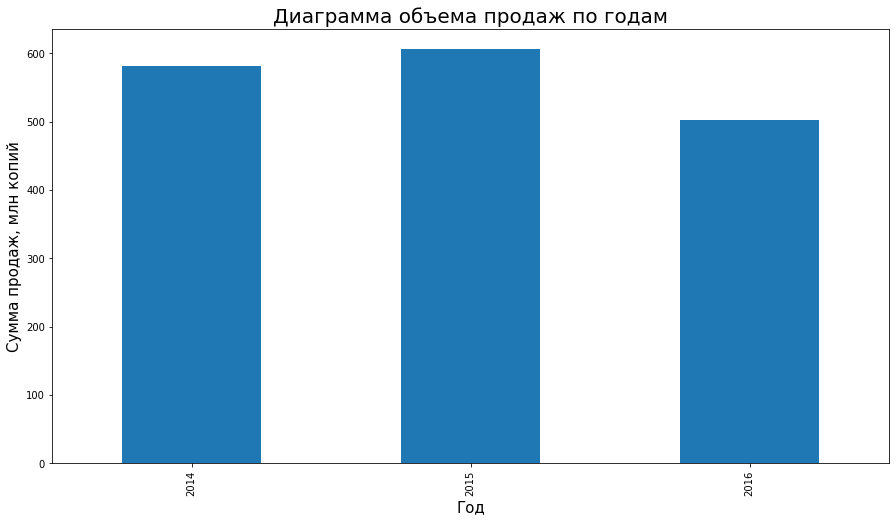

In [63]:
# подрезаю дф, беру данные от 2014 (в задании было написано, что за 2016-ый данные не полные)
games = games[games['year_of_release'] >= 2014]

# далее готовлю таблицу по ТЗ
s_games = games.groupby('year_of_release')['name'].count().plot.bar(figsize = (15,8))

s_games.set_title('Диаграмма объема продаж по годам',fontsize=20)
s_games.set_xlabel('Год',fontsize=15)
s_games.set_ylabel('Сумма продаж, млн копий',fontsize=15)

### Как менялись продажи по платформам

Добавим в таблицу столбец с суммой продаж по всем регионам, чтобы понять какие платформы самые продаваетмые по всему миру.

In [64]:
games['sales_sum'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Text(0, 0.5, 'Сумма продаж, млн копий')

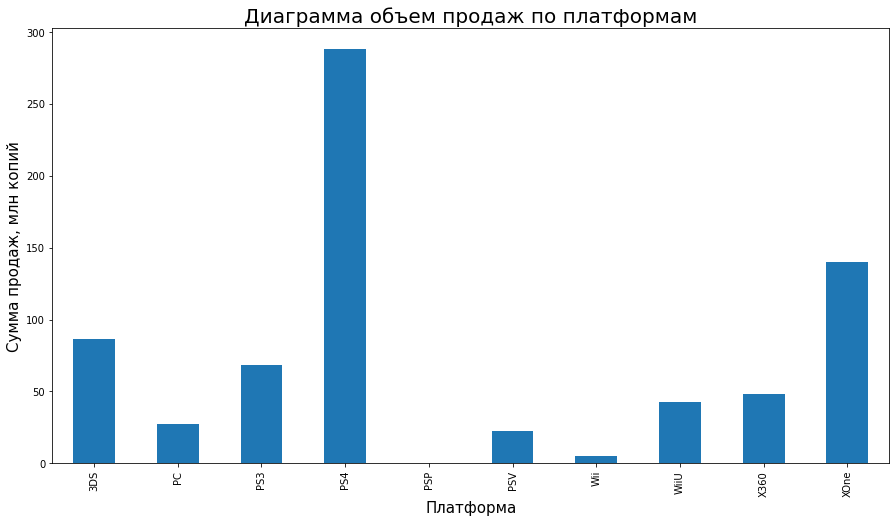

In [65]:
sl_games = games.groupby('platform')['sales_sum'].sum().plot.bar(figsize=(15,8))

sl_games.set_title('Диаграмма объем продаж по платформам',fontsize=20)
sl_games.set_xlabel('Платформа',fontsize=15)
sl_games.set_ylabel('Сумма продаж, млн копий',fontsize=15)

По графику видно явных лидеров продаж: PS4. Рассмотрим подробнее объемы продаж по годам у наиболее популярных платформ.

Text(0, 0.5, 'Сумма продаж, млн копий')

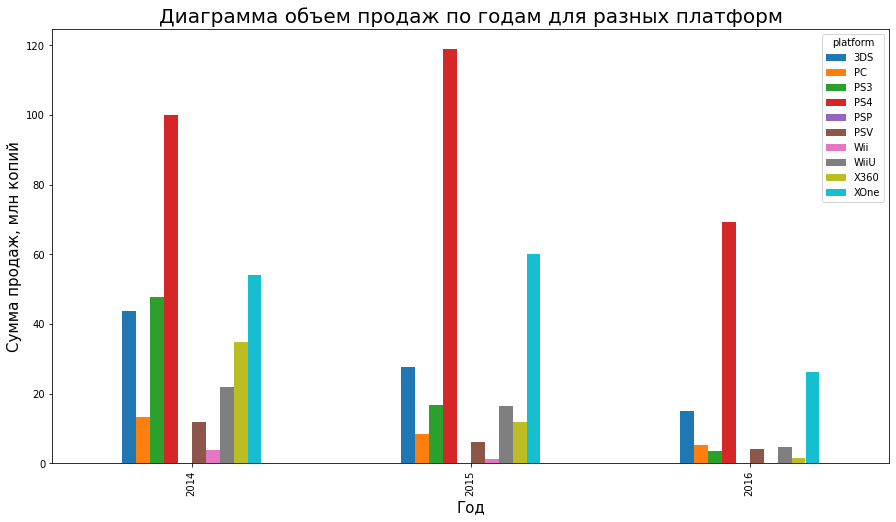

In [66]:
piv_games = games.pivot_table(index='year_of_release',columns='platform',values='sales_sum',aggfunc='sum')
bar_games = piv_games.plot.bar(figsize=(15,8))

bar_games.set_title('Диаграмма объем продаж по годам для разных платформ',fontsize=20)
bar_games.set_xlabel('Год',fontsize=15)
bar_games.set_ylabel('Сумма продаж, млн копий',fontsize=15)

В разные периоды на рынке наибольшей популярностью обладала определенная платформа. К примеру с 1996 по 1999 это была GB, затем с 2004 по конец 2005 - DS, далее до начала 2009 - Wii и наконец X360 почти до 2014. При этом PS на рынке были очень давно, продавались хорошо, но звезд с неба не хватали. Если хочется стабильности, то имеет смысл положиться на PS. К тому же, если доверять истории, пратформа взявшая верх продаж на рынке в последний рассматриваемый год - будет радовать популярностью еще года четыре.

Если брать данные за последние три года - явным лидером будет опять же PS (PS4), соответственно ставка на этого производителя будет вполне оправдана.

In [67]:
bp_games = games.pivot_table(index='platform', values='sales_sum', aggfunc= 'sum').sort_values('sales_sum', ascending=False)
bp_games.index[:9].tolist()

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii']

Text(0, 0.5, 'Сумма продаж, млн копий')

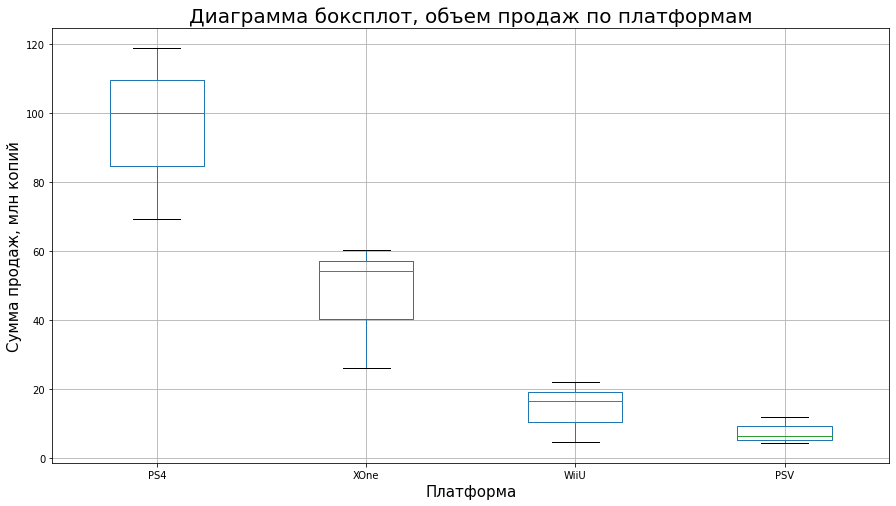

In [68]:
bp_games = piv_games.boxplot(column=['PS4', 'XOne', 'WiiU', 'PSV'],figsize=(15,8))

bp_games.set_title('Диаграмма боксплот, объем продаж по платформам',fontsize=20)
bp_games.set_xlabel('Платформа',fontsize=15)
bp_games.set_ylabel('Сумма продаж, млн копий',fontsize=15)

Продолжая анализ самых популярных платформ, были построены "Ящики с усам". По графику видно, что самые высокие медианные значения по количествам продаж наблюдаются у PS4 и XOne, на третьем месте WiiU. Далее рассмотрим объемы продаж по жанрам.

Text(0, 0.5, 'Медиана продаж, %')

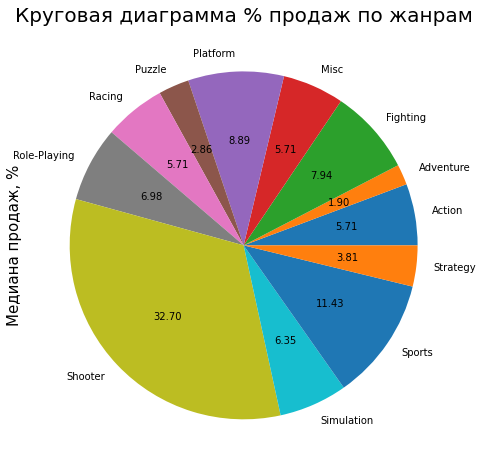

In [69]:
genre_games = games.groupby('genre')['sales_sum'].median().plot.pie(figsize=(15,8), autopct="%.2f")

genre_games.set_title('Круговая диаграмма % продаж по жанрам',fontsize=20)
genre_games.set_ylabel('Медиана продаж, %',fontsize=15)

Из всех жанров самыми "продаваемыми" можно назвать: стрелялки (33%) и игры про спорт (12%). Пользователи предпочитают шутеры так как в повседневной жизни им не хватает ~насилия~ динамичных сюжетов. Спортивные игры бронируют себе в целевую аудиторию болельшиков, спортсменов и поклонников спорта - а это достаточно обширная масса игроков. В аутсайдерах: головоломки (3%) и приключения (2%). Головоломки не пользуются популярностью вернее всего потому, что пользователь в играх ищет расслабление и отдых, а головоломки требуют умственного напряжения, как и приключения в общем случае. При планировании закупок нужно обязательно это учитывать.

### Анализ Sony PlayStation

Рассмотрим самые распространенные платформы и проанализируем пики популярности. По графику из предыдущего блока видно, что самые кассовые платформы это Sony PlayStation и Xbox. Рассмотрим Sony PlayStation так как у нее в линейке представлено больше моделей.

Text(0, 0.5, 'Сумма продаж, млн копий')

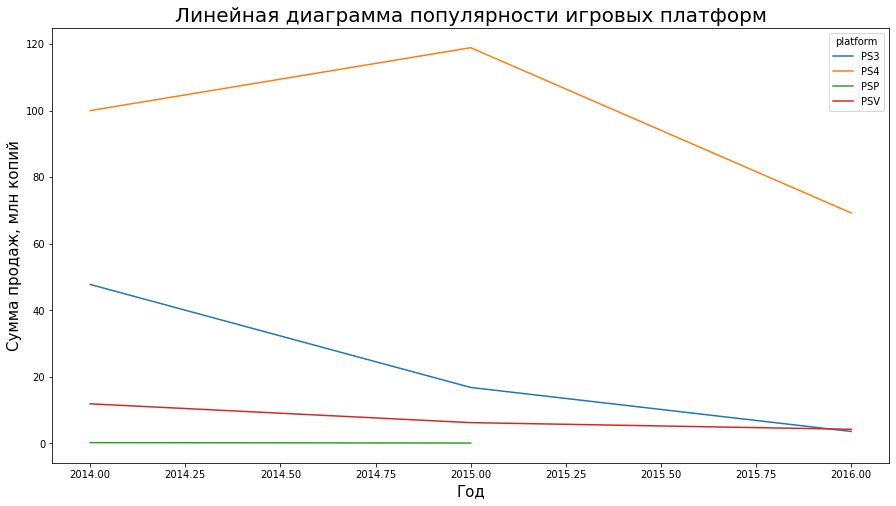

In [70]:
ps_sales = games.query('platform in ["PS","PS2","PSP","PS3","PS4","PSV"]')
ps_sales = ps_sales.drop(['name',
                          'genre',
                          'na_sales',
                          'jp_sales', 
                          'eu_sales',
                          'other_sales',
                          'critic_score',
                          'user_score',
                          'rating'], axis=1)

ps_sales = ps_sales.pivot_table(index='year_of_release',
                                columns='platform',
                                values='sales_sum',
                                aggfunc='sum').plot(figsize=(15,8))

ps_sales.set_title('Линейная диаграмма популярности игровых платформ',fontsize=20)
ps_sales.set_xlabel('Год',fontsize=15)
ps_sales.set_ylabel('Сумма продаж, млн копий',fontsize=15)

По графику выше видно, что Sony PlayStation каждый год выпускают новую платформу, иногда сразу несколько. В большинстве случаев платформы существуют на рынке около двух лет. Самой продаваемой из моделей, очевидно, является PS4.

,critic_score,user_score,sales_sum
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
sales_sum,0.402661,-0.040132,1.000000


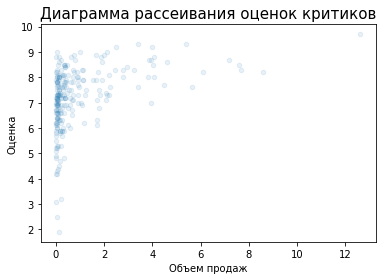

In [71]:
ps_sales = games.query('platform in ["PS4"]')
ps_sales = ps_sales.drop(['name',
                          'genre',
                          'na_sales',
                          'jp_sales', 
                          'eu_sales',
                          'other_sales',
                          'year_of_release',
                          'platform',
                          'rating'], axis=1)

t_a = ps_sales.plot(x='sales_sum', y='critic_score', kind='scatter', alpha=0.1)

t_a.set_title('Диаграмма рассеивания оценок критиков', fontsize = 15)
t_a.set_xlabel('Объем продаж', fontsize = 10)
t_a.set_ylabel('Оценка', fontsize = 10)
ps_sales.corr()

Text(0, 0.5, 'Оценка')

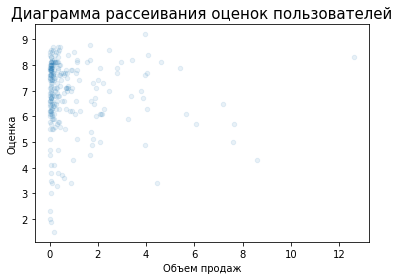

In [72]:
t_b = ps_sales.plot(x='sales_sum', y='user_score', kind='scatter', alpha=0.1)

t_b.set_title('Диаграмма рассеивания оценок пользователей', fontsize = 15)
t_b.set_xlabel('Объем продаж', fontsize = 10)
t_b.set_ylabel('Оценка', fontsize = 10)


По графикам рассеивания можно увидеть, что оценки критиков имеют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют. Можно увидеть, что те игры, которым эксперты дают высокие оценки - продаются лучше.

### Вывод

- В процессе исследования было учтено, что первый персональный компьютер появился в 1981 году и разумеется ближайшие лет 10 разработка игр не была приоритетной задачей. По графику видно, что с 1995 в год начали продавать свыше 200 млн. копий в год. После 1995 каждый следующий год продажи подрастают на 100 млн. копий и так до 2009-го, почти 15 лет идет планомерный рост объемов продаж. С 2009 популярность видеоигр начала падать, вероятнее всего это характеризуется взрослением целевой аудитории. Прошлая аудитория повзрослела, а новую привлечь не успели из-за слабой пи-ар компании. Также общество после 2009 возможно провело переоценку влияния видеоигр на человека и изменило свою политику на этот счет. 


- Лидером продаж оказалась платформа PS4


- Было обнаружено что в разные периоды на рынке наибольшей популярностью обладала определенная платформа. К примеру с 1996 по 1999 это была GB, затем с 2004 по конец 2005 - DS, далее до начала 2009 - Wii и наконец X360 почти до 2014. При этом PS на рынке были очень давно, продавались хорошо, но звезд с неба не хватали. Если хочется стабильности, то имеет смысл положиться на PS. К тому же, если доверять истории, пратформа взявшая верх продаж на рынке в последний рассматриваемый год - будет радовать популярностью еще года четыре.Если брать данные за последние три года - явным лидером будет опять же PS (PS4), соответственно ставка на этого производителя будет вполне оправдана.


- Продолжая анализ самых популярных платформ, были построены "Ящики с усам". По графику видно, что самые высокие медианные значения по количествам продаж наблюдаются у PS4 и XOne, на третьем месте WiiU. Далее рассмотрим объемы продаж по жанрам.


- Из всех жанров самыми "продаваемыми" можно назвать: стрелялки (33%) и игры про спорт (12%). Пользователи предпочитают шутеры так как в повседневной жизни им не хватает ~насилия~ динамичных сюжетов. Спортивные игры бронируют себе в целевую аудиторию болельшиков, спортсменов и поклонников спорта - а это достаточно обширная масса игроков. В аутсайдерах: головоломки (3%) и приключения (2%). Головоломки не пользуются популярностью вернее всего потому, что пользователь в играх ищет расслабление и отдых, а головоломки требуют умственного напряжения, как и приключения в общем случае. При планировании закупок нужно обязательно это учитывать.


- По графику выше видно, что Sony PlayStation каждый год выпускают новую платформу, иногда сразу несколько. В большинстве случаев платформы существуют на рынке около двух лет. Самой продаваемой из моделей, очевидно, является PS4.


- По графикам рассеивания мы узнали, что оценки критиков имеют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют. Можно увидеть, что те игры, которым эксперты дают высокие оценки - продаются лучше.

## Составление портрета пользователя каждого региона

<a id='5-topoc'></a>

Далее проведем аналитику по отдельным регионам и выявим закономерности.

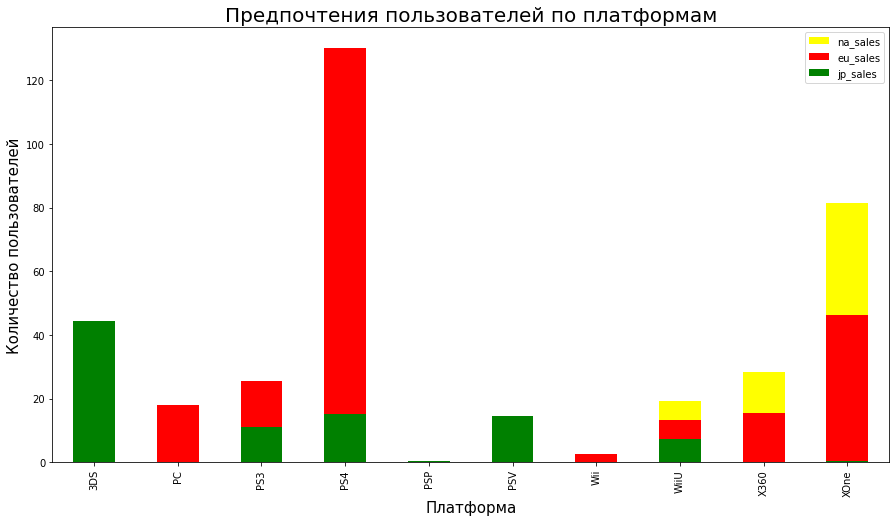

In [73]:
na_users = games.groupby('platform')['na_sales'].sum().plot.bar(color='yellow',figsize=(15,8),grid=True,legend=True)
eu_users = games.groupby('platform')['eu_sales'].sum().plot.bar(color='red',legend=True)
jp_users = games.groupby('platform')['jp_sales'].sum().plot.bar(color='green',legend=True)

na_users.set_title('Предпочтения пользователей по платформам', fontsize = 20)
na_users.set_xlabel('Платформа', fontsize = 15)
na_users.set_ylabel('Количество пользователей', fontsize = 15)

plt.show()

Text(0, 0.5, 'Количество пользователей')

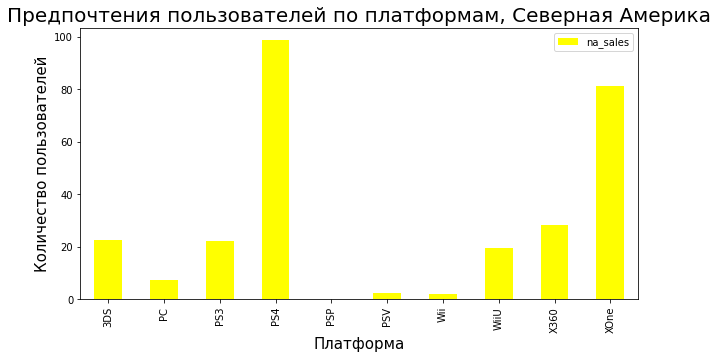

In [74]:
na_users = games.groupby('platform')['na_sales'].sum().plot.bar(color='yellow',figsize=(10,5),legend=True)

na_users.set_title('Предпочтения пользователей по платформам, Северная Америка', fontsize = 20)
na_users.set_xlabel('Платформа', fontsize = 15)
na_users.set_ylabel('Количество пользователей', fontsize = 15)

Text(0, 0.5, 'Количество пользователей')

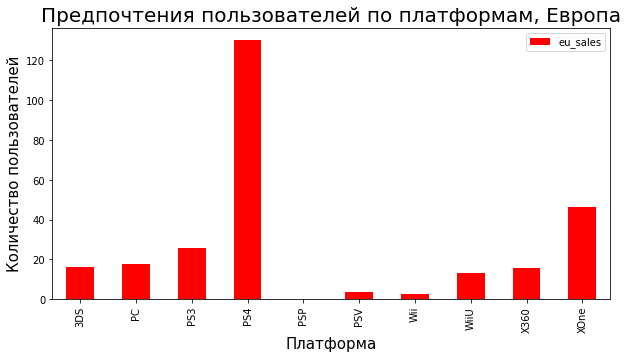

In [75]:
eu_users = games.groupby('platform')['eu_sales'].sum().plot.bar(color='red',figsize=(10,5),legend=True)

eu_users.set_title('Предпочтения пользователей по платформам, Европа', fontsize = 20)
eu_users.set_xlabel('Платформа', fontsize = 15)
eu_users.set_ylabel('Количество пользователей', fontsize = 15)

Text(0, 0.5, 'Количество пользователей')

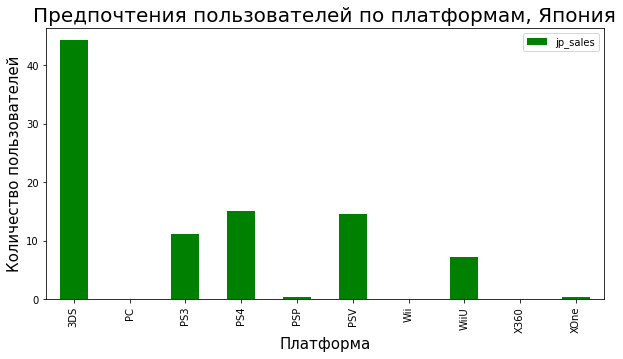

In [76]:
jp_users = games.groupby('platform')['jp_sales'].sum().plot.bar(color='green',figsize=(10,5),legend=True)

jp_users.set_title('Предпочтения пользователей по платформам, Япония', fontsize = 20)
jp_users.set_xlabel('Платформа', fontsize = 15)
jp_users.set_ylabel('Количество пользователей', fontsize = 15)

По графикам выше видно, что в разных регионах предпочтения по платформам не сильно, но различаются. Для Северной Америки топ пять - PS4, XOne, X360, 3DC,PS3. Для Европы - PS4, XOne, X360, 3DC,PS3. Для Японии - 3DC, PS4, PSV, PS3, WiiU. У Wii и DC - производитель японская компания Nintendo, у PlayStation тоже японская компания Sony.Платформу XOne - производит американская компания Microsoft. Именно поэтому у Северной Америки в топ входит именно XOne, а Япония эту платформу покупает очень редко (возможно тут играют геополитические нюансы). Европа же подходит к покупке объективно и пользуется платформами разных производителей.

Text(0, 0.5, 'Количество пользователей')

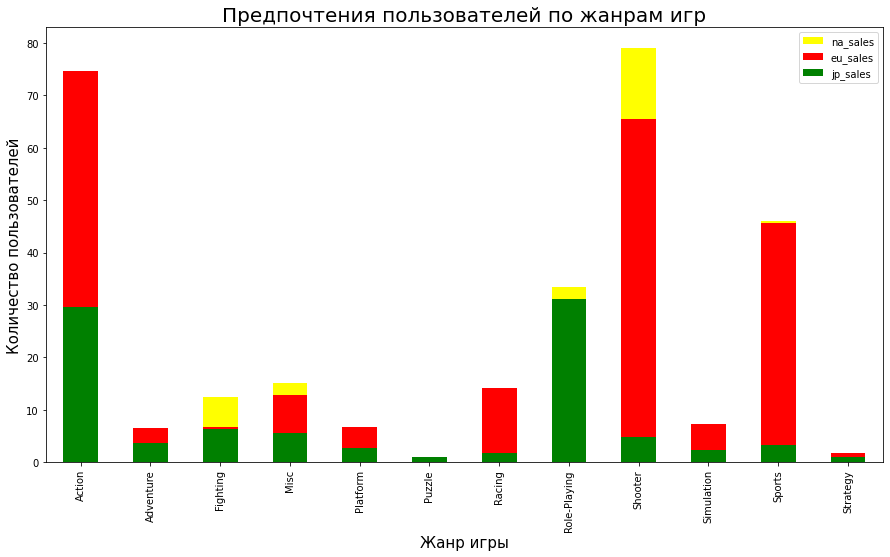

In [77]:
na_users = games.groupby('genre')['na_sales'].sum().plot.bar(color='yellow',figsize=(15,8),grid=True,legend=True)
eu_users = games.groupby('genre')['eu_sales'].sum().plot.bar(color='red',legend=True)
jp_users = games.groupby('genre')['jp_sales'].sum().plot.bar(color='green',legend=True)

na_users.set_title('Предпочтения пользователей по жанрам игр', fontsize = 20)
na_users.set_xlabel('Жанр игры', fontsize = 15)
na_users.set_ylabel('Количество пользователей', fontsize = 15)

По графику можно заметить, что пользователи из Европы и Северной Америки отдают предпочтение играм жанра Шутер. Пользователи из Японии предпочитают ролевые игры.

Text(0, 0.5, 'Количество пользователей')

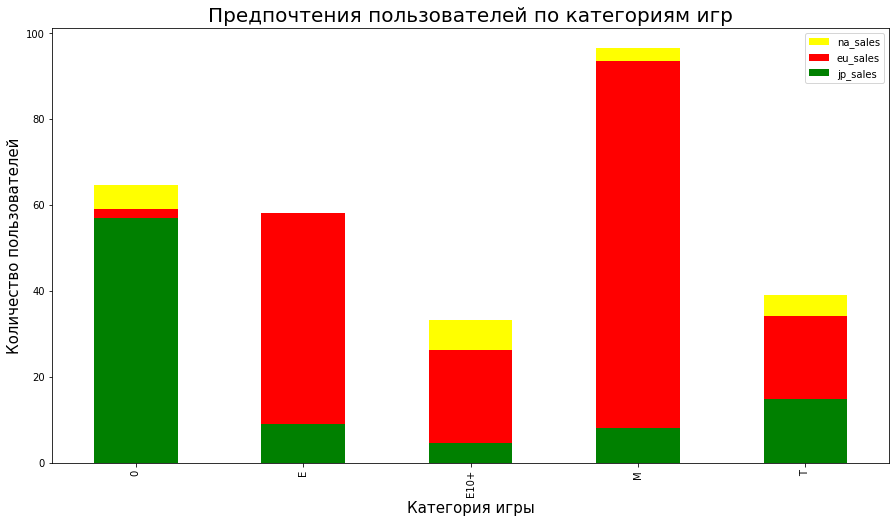

In [78]:
na_users = games.groupby('rating')['na_sales'].sum().plot.bar(color='yellow',figsize=(15,8),grid=True,legend=True)
eu_users = games.groupby('rating')['eu_sales'].sum().plot.bar(color='red',legend=True)
jp_users = games.groupby('rating')['jp_sales'].sum().plot.bar(color='green',legend=True)

na_users.set_title('Предпочтения пользователей по категориям игр', fontsize = 20)
na_users.set_xlabel('Категория игры', fontsize = 15)
na_users.set_ylabel('Количество пользователей', fontsize = 15)


По графику выше видно что у различных регионов также есть предпочтения по классифокации Entertainment Software Rating Board. Пользователи Европы - играм категории «Для взрослых», а пользователи Северной Америки - «Для всех от 10 лет и старше». Пользователи Японии не пользуются рейтингом ESRB, так как в Японии есть свой собственный рейтинг.

### Вывод

Из проведенного выше исследования можно составить приблизительные портреты пользователей из разных регионов:

1) Пользователи из Северной Америки предпочитают платформу XOne. Играют в игры жанра Шутер , категории «Для всех от 10 лет и старше» 

2) Пользователи из Европы предпочитают платформу PS4. Играют в игры жанра Шутер, категории "Для взрослых" 

3) Пользователи из Японии предпочитают платформу 3DC. Играют в игры жанра Ролевые, категориями не интересуются

## Проверка гипотез

<a id='6-topoc'></a>

### Гепотеза 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Так как объемы продаж у PC больше, чем у Xbox One логично допустить, что пользователи PC оценивают выше. Альтернативной гепотезой будет - средний пользовательский рейтинг PC больше, чем Xbox One.

In [36]:
xb_score = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_score = games[games['platform'] == 'PC']['user_score'].dropna()

In [37]:
alpha = 0.05

results = st.ttest_ind(pc_score, xb_score, alternative='greater')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9477474604032579
Не получилось отвергнуть нулевую гипотезу


У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

### Гепотеза 2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Альтернативную гепотезу сформулируем как - Средние пользовательские рейтинги жанров Action и Sports равны.

In [38]:
act_score = games[games['genre'] == 'Action']['user_score'].dropna()
sp_score = games[games['genre'] == 'Sports']['user_score'].dropna()

In [39]:
alpha = 0.05

results = st.ttest_ind(sp_score, act_score,  alternative='greater')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Принимаем нулевую гепотезу')
else:
    print('Отвергаем нулевую гепотезу')

p-значение: 1.0
Отвергаем нулевую гепотезу


У нас нет оснований полагать, что средние пользовательские рейтинги жанров Action и Sports значимо различаются

### Вывод

- У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

- У нас нет оснований полагать, что средние пользовательские рейтинги жанров Action и Sports значимо различаются

## Вывод
<a id='7-topoc'></a>

Для анализа был получен датасет из 11 колонок и 16714 строк. В процессе предобработки данных были упорядочены названия столбцов датафрейма, типы данных, обработаны пропуски и проведена проверка на дубликаты. Данные для исследования были получены не очень хорошего качества, но после предобработки стали пригодны для исследования.

**В процессе предобработки** обнаружились пропуски в столбце с годом релиза игры, оценках критиков и пользователей, рейтинге.

    1) В столбце с годом релиза пропусков очень небольшое количество, вероятно это человеческий фактор при сборе данных послужил причиной. Пропуски наблюдаются менее чем в 2% данных, поэтому их вполне безболезненно удалили.

    2) В таблице пропущенных значений видно, что пропуски в оценках пользователей, критиков и рейтинге зачастую наблюдаюстя в одних и тех же строках, что подсказывает нам - природа у пропусков одинаковая. Вероятно в нашем исследовании присутствуют игры от инди разработчиков или "пиратские" версии. Такие игры не оцениваются рейтинговыми агенствами и не получают официальных оценок от критиков или пользователей.Тем не менее пропущенных значений слишком много, чтобы их можно было заменить или восполнить без потери актуальности, поэтому оставили значения как есть.

    3) В оценках пользователей присутствует строковое значение tbd - To Be Determined. Выходит, эти оценки еще не опубликованы - их заменили на нули.

    4) При проверке на дубликаты пары "Имя - Игровая консоль" было обнаружено четыре дубликата, количество относительно маленькое - их удалили.

При **исследовательском анализе** удалось выяснить следующее:


    - В процессе исследования было учтено, что первый персональный компьютер появился в 1981 году и разумеется ближайшие лет 10 разработка игр не была приоритетной задачей. По графику видно, что с 1995 в год начали продавать свыше 200 млн. копий в год. После 1995 каждый следующий год продажи подрастают на 100 млн. копий и так до 2009-го, почти 15 лет идет планомерный рост объемов продаж. С 2009 популярность видеоигр начала падать, вероятнее всего это характеризуется взрослением целевой аудитории. Прошлая аудитория повзрослела, а новую привлечь не успели из-за слабой пи-ар компании. Также общество после 2009 возможно провело переоценку влияния видеоигр на человека и изменило свою политику на этот счет. 


    - Лидером продаж оказалась платформа PS4


    - Было обнаружено что в разные периоды на рынке наибольшей популярностью обладала определенная платформа. К примеру с 1996 по 1999 это была GB, затем с 2004 по конец 2005 - DS, далее до начала 2009 - Wii и наконец X360 почти до 2014. При этом PS на рынке были очень давно, продавались хорошо, но звезд с неба не хватали. Если хочется стабильности, то имеет смысл положиться на PS. К тому же, если доверять истории, пратформа взявшая верх продаж на рынке в последний рассматриваемый год - будет радовать популярностью еще года четыре.Если брать данные за последние три года - явным лидером будет опять же PS (PS4), соответственно ставка на этого производителя будет вполне оправдана.


    - Продолжая анализ самых популярных платформ, были построены "Ящики с усам". По графику видно, что самые высокие медианные значения по количествам продаж наблюдаются у PS4 и XOne, на третьем месте WiiU. Далее рассмотрим объемы продаж по жанрам.


    - Из всех жанров самыми "продаваемыми" можно назвать: стрелялки (33%) и игры про спорт (12%). Пользователи предпочитают шутеры так как в повседневной жизни им не хватает ~насилия~ динамичных сюжетов. Спортивные игры бронируют себе в целевую аудиторию болельшиков, спортсменов и поклонников спорта - а это достаточно обширная масса игроков. В аутсайдерах: головоломки (3%) и приключения (2%). Головоломки не пользуются популярностью вернее всего потому, что пользователь в играх ищет расслабление и отдых, а головоломки требуют умственного напряжения, как и приключения в общем случае. При планировании закупок нужно обязательно это учитывать.


    - По графику выше видно, что Sony PlayStation каждый год выпускают новую платформу, иногда сразу несколько. В большинстве случаев платформы существуют на рынке около двух лет. Самой продаваемой из моделей, очевидно, является PS4.


    - По графикам рассеивания мы узнали, что оценки критиков имеют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют. Можно увидеть, что те игры, которым эксперты дают высокие оценки - продаются лучше.


Также можно составить приблизительные **портреты пользователей** из разных регионов:

    1) Пользователи из Северной Америки предпочитают платформу XOne. Играют в игры жанра Шутер , категории «Для всех от 10 лет и старше»

    2) Пользователи из Европы предпочитают платформу PS4. Играют в игры жанра Шутер, категории "Для взрослых"

    3) Пользователи из Японии предпочитают платформу 3DC. Играют в игры жанра Ролевые, категориями не интересуются

В процессе **статистического анализа данных** было построено две гепотезы:

    1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гепотеза оказалась не верна -  у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

    2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - у нас нет оснований полагать, что средние пользовательские рейтинги жанров Action и Sports значимо различаются
    
По результатам исследования самыми продаваемыми оказались игры на PS4 и XOne. У нас нет оснований полагать, что пользовательские рейтинги этих двух платформ значительно отличаются, поэтому на них заострять внимание не стоит. В Европе и Северной Америке следовало бы отдать предпочтения шутерам категории 10+ , а в Японии - ролевым играм. При этом следует учитывать, что за последнее время продажи начали снижаться - общество винит видеоигры в дурном влиянии на детей и развитии склонности к насилию. Чтобы реклама была успешной нужно учесть беспокойство общественности и продемонстрировать положительные тенденции влияниия на аудиторию.